In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

from pandas_profiling import ProfileReport

pd.set_option("max_rows", 200)

filterwarnings("ignore")

sns.set_theme()

print("Imported")

Imported


In [ ]:
data = pd.read_csv("airbnb_listing_final_dataset.csv")
data.T

In [92]:
data.head()

,Host Response Time,Host Acceptance Rate,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Market,Property Type,Room Type,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
0,within an hour,NaN,humboldt park,humboldt park,NaN,chicago,il,chicago,apartment,private room,...,15.0,100.0,10.0,10.0,10.0,10.0,9.0,10.0,2.0,3.49
1,within a day,NaN,humboldt park,humboldt park,NaN,chicago,il,chicago,house,private room,...,41.0,96.0,10.0,10.0,10.0,10.0,9.0,10.0,1.0,1.82
2,within an hour,NaN,humboldt park,humboldt park,NaN,chicago,il,chicago,apartment,private room,...,2.0,100.0,10.0,9.0,10.0,10.0,10.0,10.0,1.0,2.00
3,within an hour,NaN,NaN,humboldt park,NaN,chicago,il,chicago,apartment,entire home/apt,...,6.0,97.0,9.0,9.0,10.0,10.0,9.0,10.0,2.0,6.00
4,within an hour,NaN,garfield park,east garfield park,NaN,chicago,il,chicago,house,private room,...,80.0,96.0,10.0,9.0,10.0,10.0,8.0,9.0,3.0,6.58


In [105]:
missing = data.isnull().sum()

In [ ]:
ProfileReport(data)

In [41]:
data.select_dtypes("object").head()

,Host Response Time,Host Acceptance Rate,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Market,Property Type,Room Type,Bed Type,Has Availability,License,Jurisdiction Names,Cancellation Policy
0,within an hour,NaN,humboldt park,humboldt park,NaN,chicago,il,chicago,apartment,private room,real bed,NaN,NaN,"illinois state, cook county, il, chicago",strict
1,within a day,NaN,humboldt park,humboldt park,NaN,chicago,il,chicago,house,private room,real bed,NaN,city registration pending,"illinois state, cook county, il, chicago",flexible
2,within an hour,NaN,humboldt park,humboldt park,NaN,chicago,il,chicago,apartment,private room,real bed,NaN,city registration pending,"illinois state, cook county, il, chicago",moderate
3,within an hour,NaN,NaN,humboldt park,NaN,chicago,il,chicago,apartment,entire home/apt,real bed,NaN,city registration pending,"illinois state, cook county, il, chicago",flexible
4,within an hour,NaN,garfield park,east garfield park,NaN,chicago,il,chicago,house,private room,real bed,NaN,city registration pending,"illinois state, cook county, il, chicago",strict


In [42]:
data.select_dtypes("object").columns

Index(['Host Response Time', 'Host Acceptance Rate', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City',
       'State', 'Market', 'Property Type', 'Room Type', 'Bed Type',
       'Has Availability', 'License', 'Jurisdiction Names',
       'Cancellation Policy'],
      dtype='object')

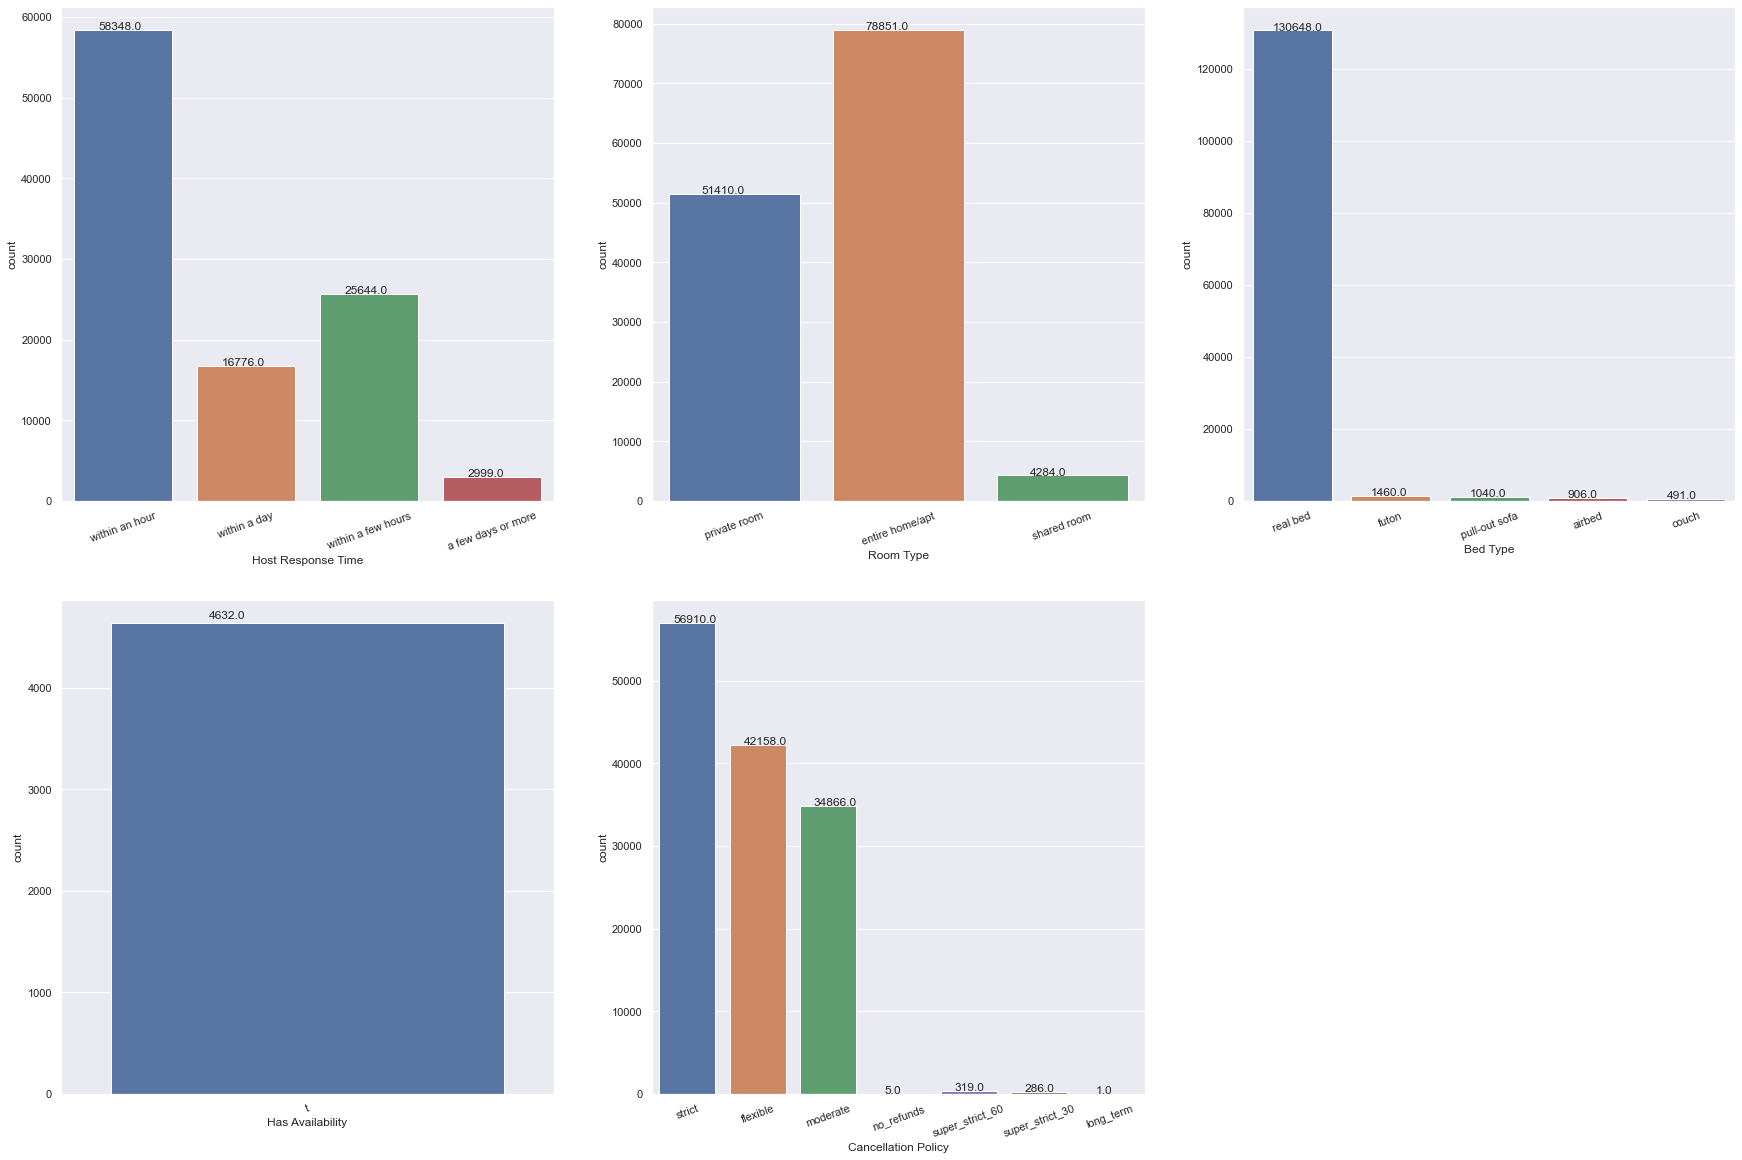

In [89]:
cat_col = data.select_dtypes("object").columns

a,b,c = 2,3,1
plt.figure(figsize=(30,20))
for i in cat_col:
    if data[i].nunique() <= 10:
        plt.subplot(a,b,c)
        ax = sns.countplot(data[i])
        plt.xticks(rotation = 20)
        for p in ax.patches:
                ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+50))
        #ax.yaxis.set_ticks(np.linspace(0, data.shape[0], 11))
        c += 1

plt.show()

## Room Type - X - Bed Type

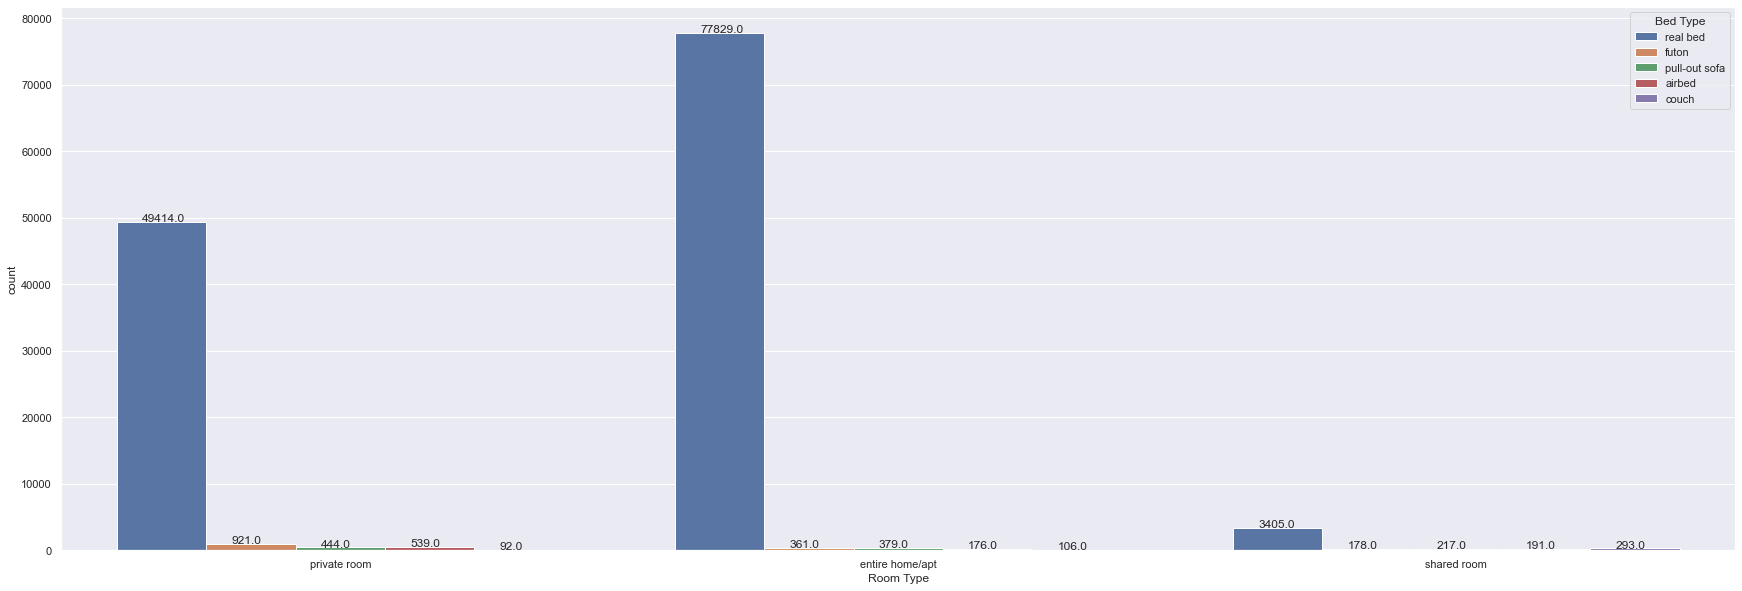

In [212]:
plt.figure(figsize = (30,10))
ax = sns.countplot(data["Room Type"], hue = data["Bed Type"])
for i in ax.patches:
        ax.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.045, i.get_height()+50))
#ax.yaxis.set_ticks(np.linspace(0, data.shape[0], 11))
plt.show()

## PRICE W.R TO STATE & ROOM TYPE

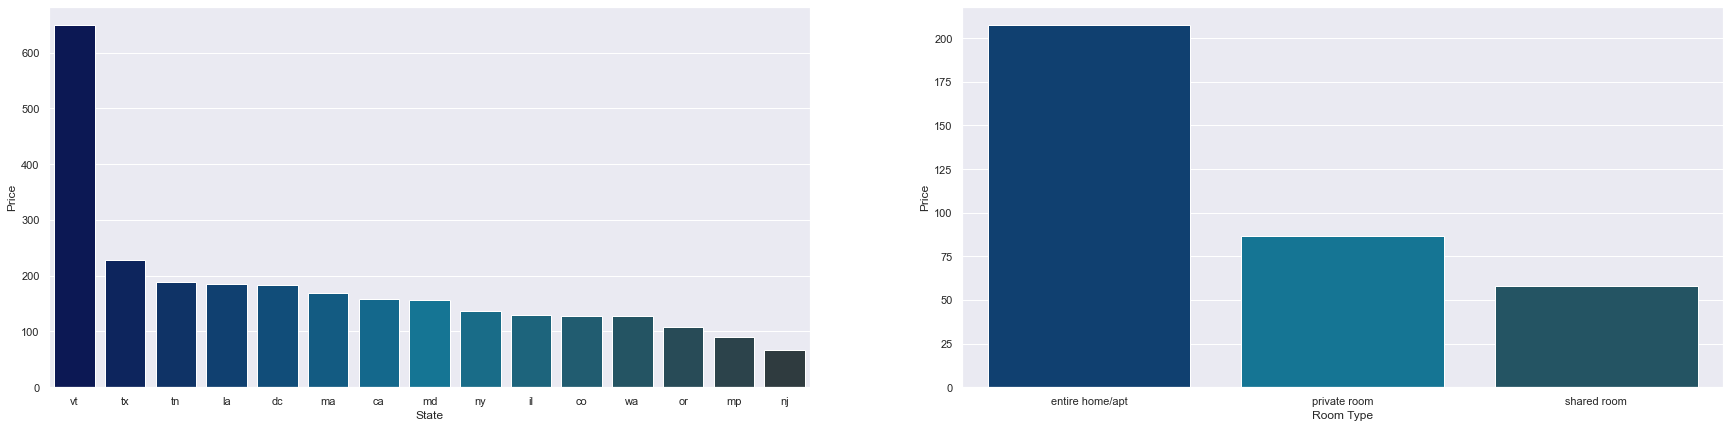

In [39]:
plt.figure(figsize = (30,7))
plt.subplot(1,2,1)
group_1 = data.groupby(["State"])[["Price"]].mean().sort_values("Price", ascending = False)
sns.barplot(x = group_1.index, y = group_1["Price"], palette = "ocean_d")

plt.subplot(1,2,2)
group_2 = data.groupby(["Room Type"])[["Price"]].mean().sort_values("Price", ascending = False)
sns.barplot(x = group_2.index, y = group_2["Price"], palette = "ocean_d")
plt.show()

## PRICE W.R TO MARKET

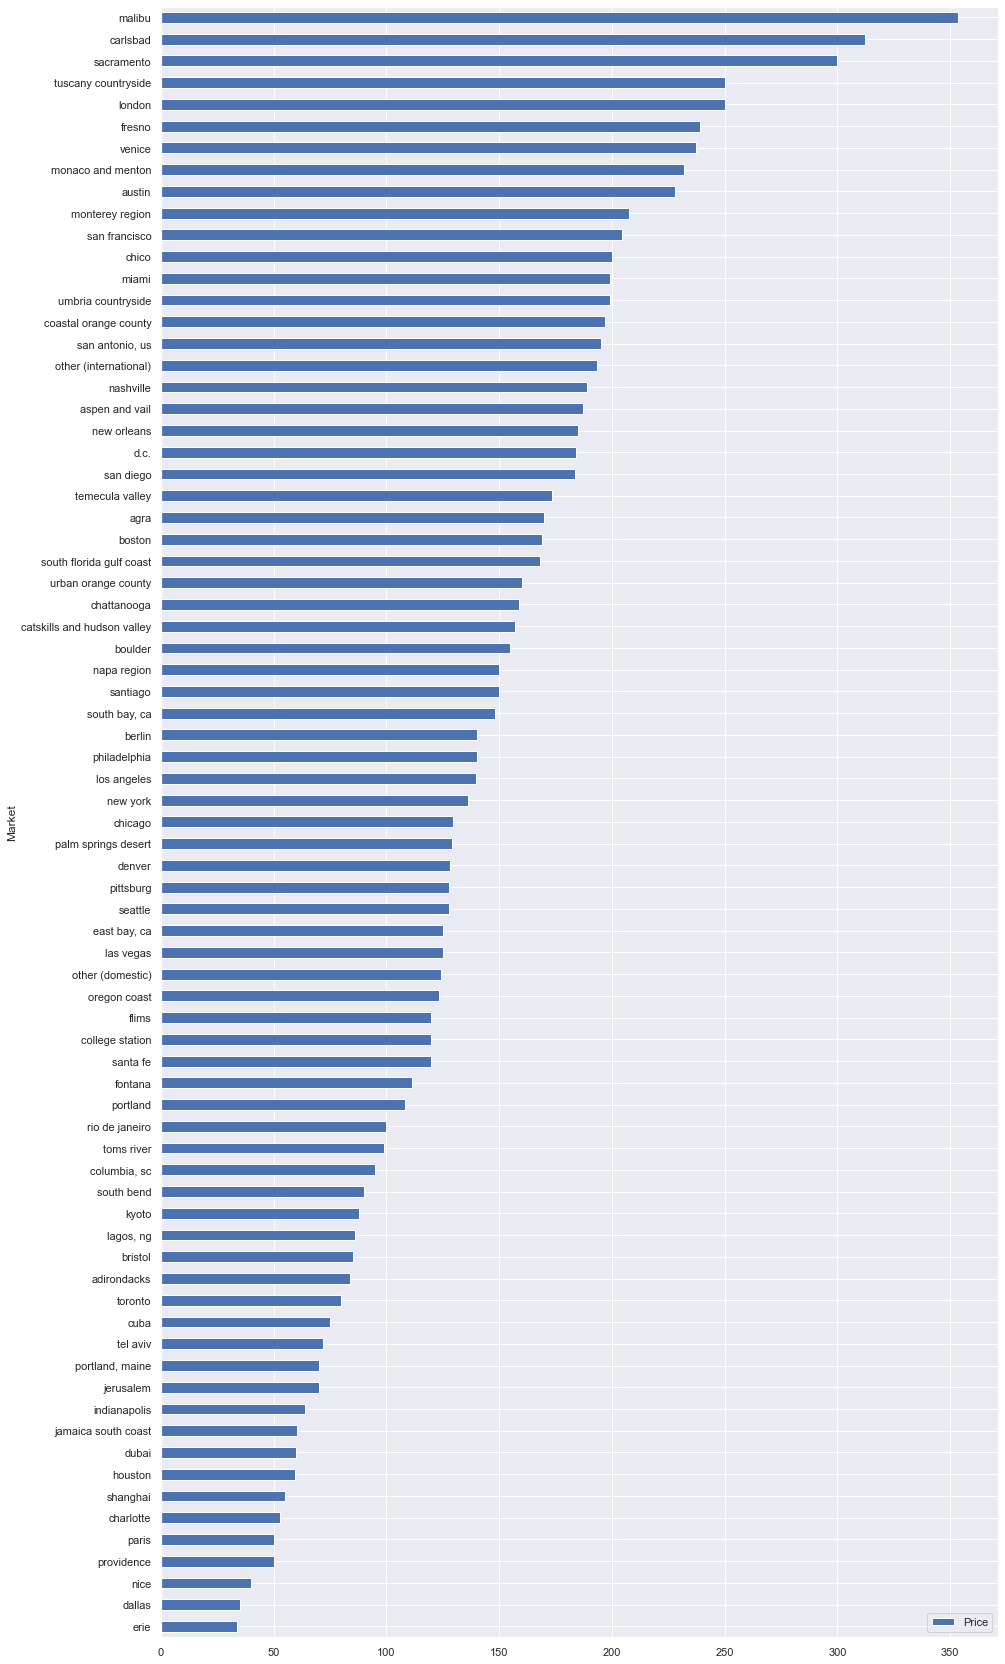

In [17]:
group_a = data.groupby(["Market"])[["Price"]].mean().sort_values("Price")
group_a.plot(kind = "barh", figsize = (15,30))
plt.show()

## PRICE W.R TO PROPERTY TYPE

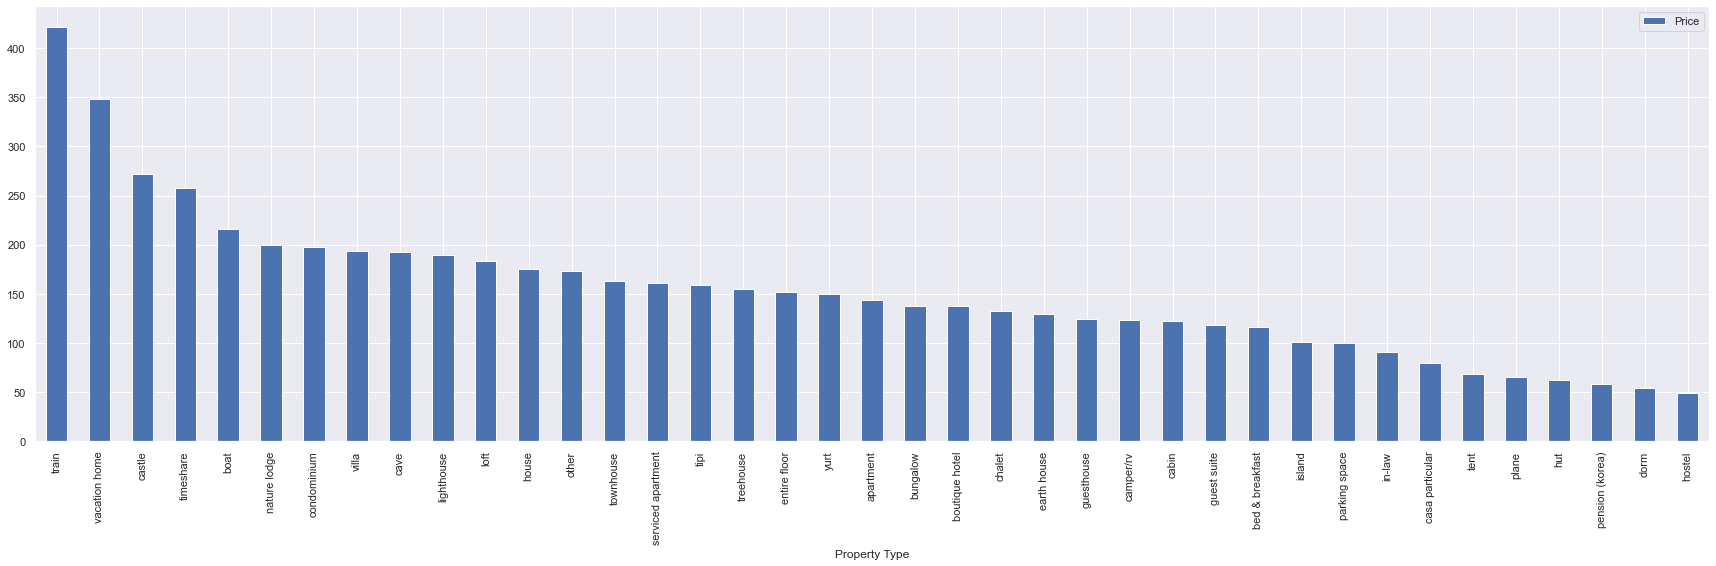

In [21]:
data.groupby(["Property Type"])[["Price"]].mean().sort_values("Price", ascending = False).plot(kind = "bar",figsize = (30,8))
plt.show()

### Is there any relationshiop between price and total number of amenities?

In [155]:
df = pd.read_csv("/Users/dineshkumaranbalagan/Downloads/airbnb-listings.csv", sep = ";")

In [158]:
df = df[df["Country"] == "United States"]
df.dropna(subset=["Amenities"], inplace = True)

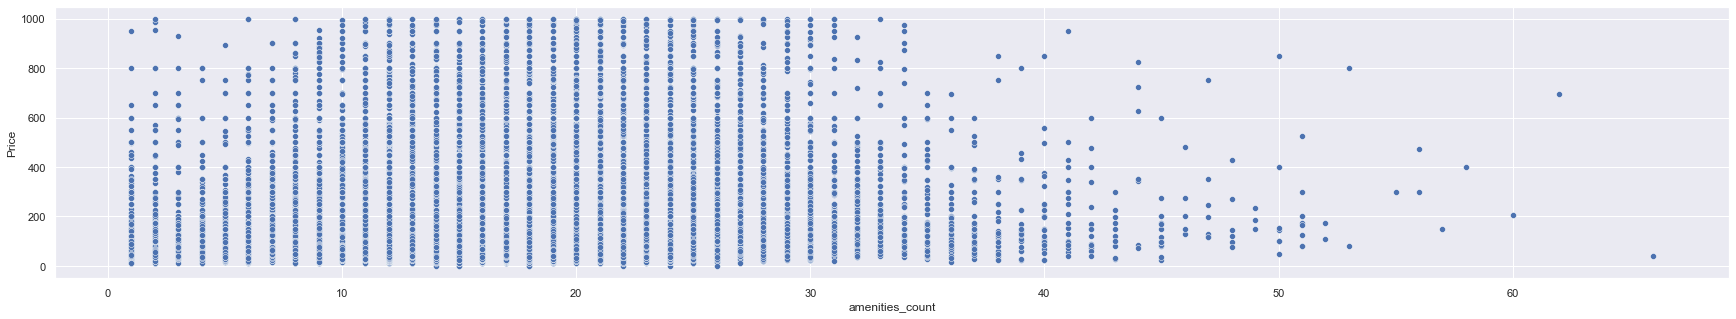

In [167]:
df["amenities_count"] = df["Amenities"].apply(lambda x : len(x.split(",")))


plt.figure(figsize = (30,5))
sns.scatterplot(x = df["amenities_count"], y = df["Price"])
plt.show()

### Is there any relationship between price and separated amenities?

In [198]:
splitted = df["Amenities"].str.split(",", expand = True)
cols = splitted.columns
z = []
for i in cols:
    uni = splitted[i].unique()
    z.extend(uni)

am_col = list(set(z))
am_col.remove(None)
am_col.remove("Wireless Internet")

In [199]:
am_col = [i.lower() for i in am_col]
data[am_col]

,wheelchair accessible,kitchen,hot tub,doorman,wide clearance to bed,oven,translation missing: en.hosting_amenity_49,hangers,waterfront,ethernet connection,...,children’s books and toys,elevator in building,free parking on street,translation missing: en.hosting_amenity_50,stair gates,bathtub,indoor fireplace,firm matress,disabled parking spot,suitable for events
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134540,0,1,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
134541,0,1,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
134542,0,1,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
134543,0,1,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


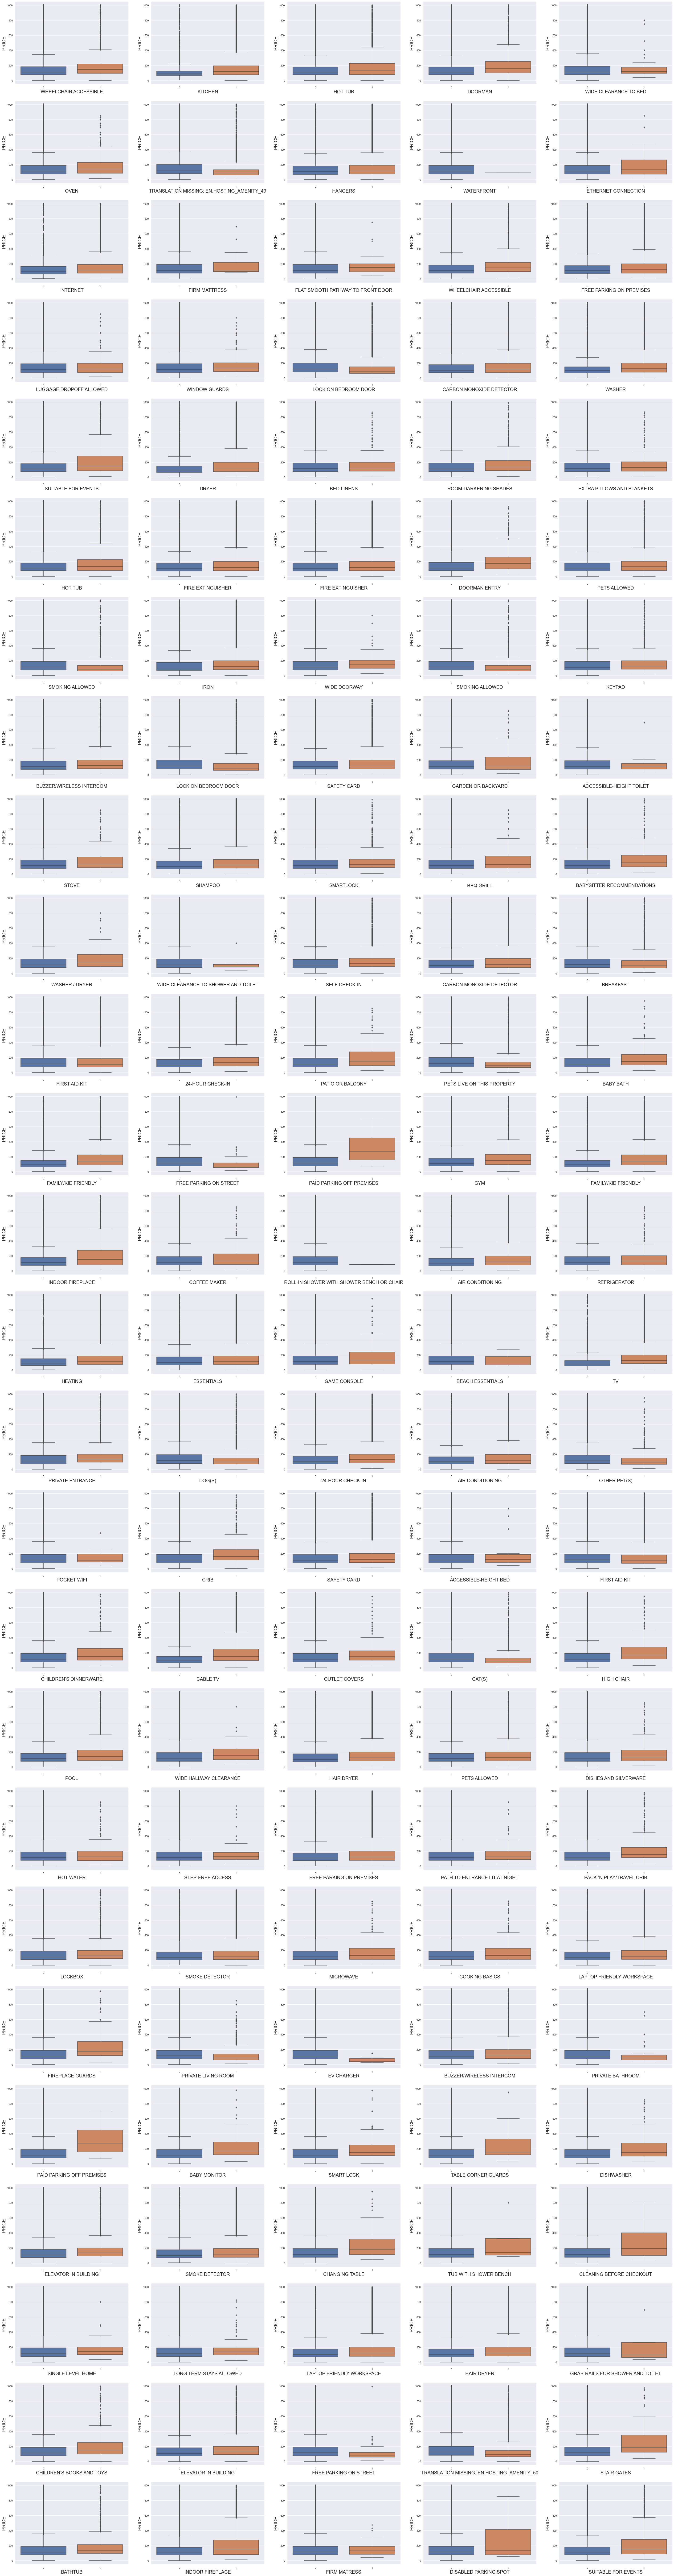

In [211]:
plt.figure(figsize = (50,200))
a,b,c = 26,5,1
for i in am_col:
    plt.subplot(a,b,c)
    sns.boxplot(x = data[i], y = data["Price"])
    plt.xlabel(i.upper(), fontsize = 20)
    plt.ylabel("PRICE", fontsize = 20)
    c = c+1
plt.show()

### Is there any relationship between review score rating and the price?

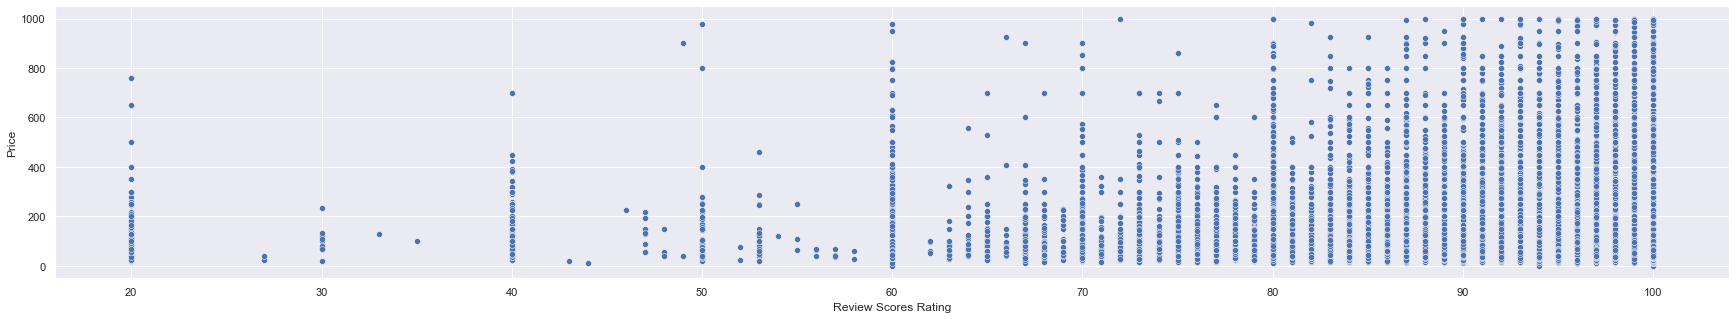

In [217]:
plt.figure(figsize = (30,5))
sns.scatterplot(x = data["Review Scores Rating"], y = data["Price"])
plt.show()

### Is there any relationship between review score cleanliness and the price?

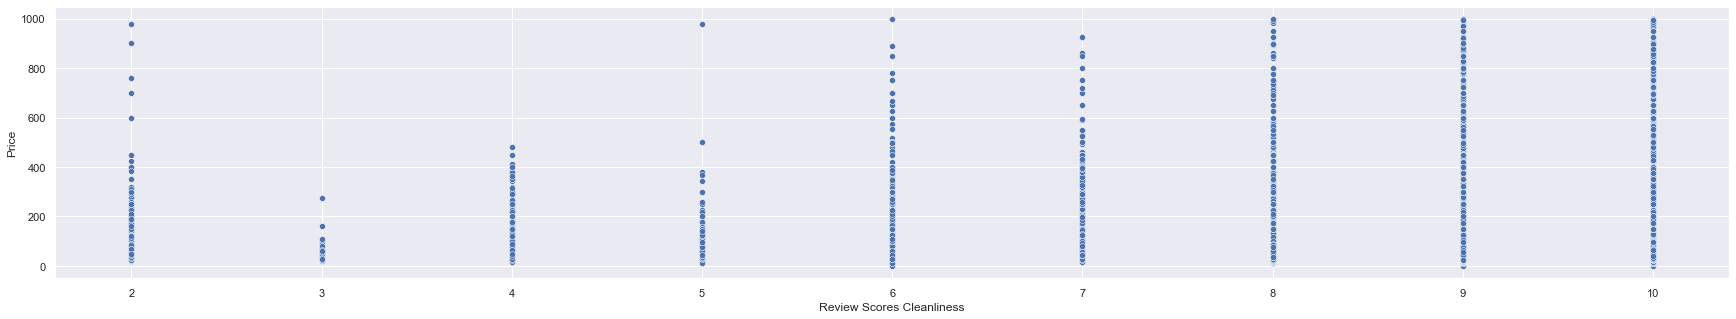

In [214]:
plt.figure(figsize = (30,5))
sns.scatterplot(x = data["Review Scores Cleanliness"], y = data["Price"])
plt.show()

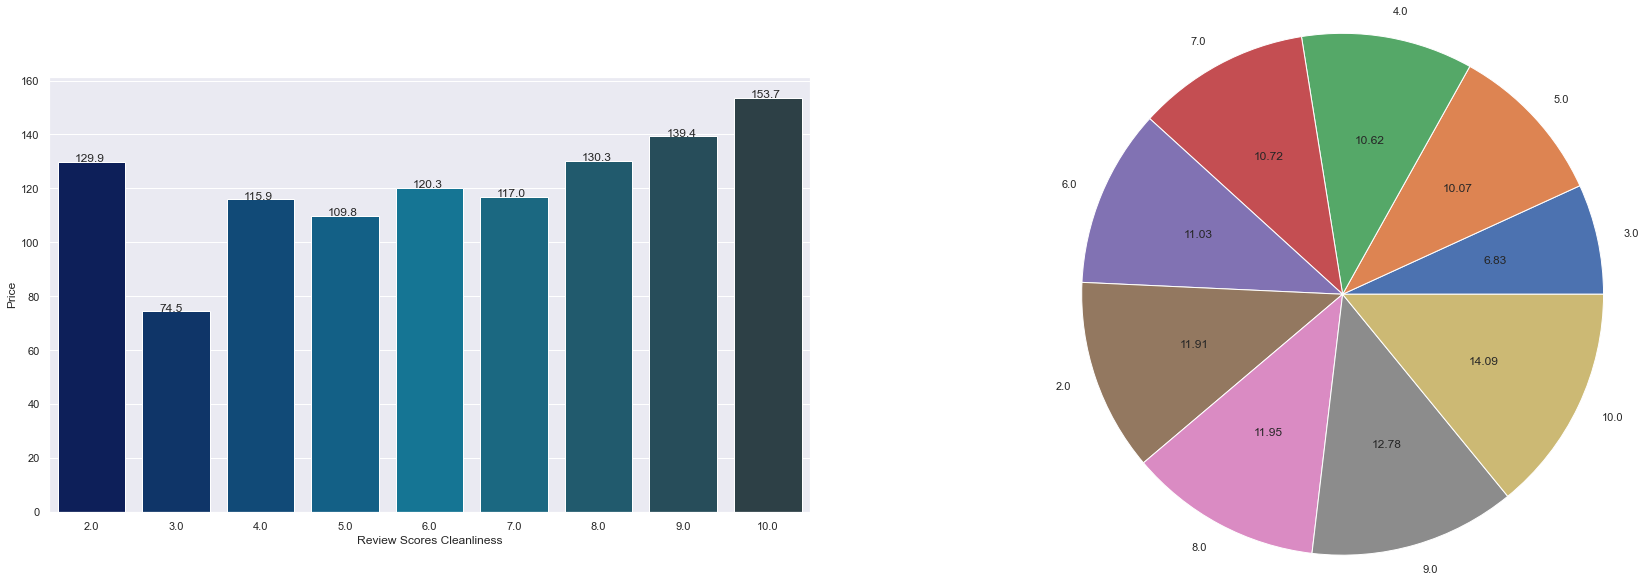

In [246]:
grouped = data.groupby("Review Scores Cleanliness")[["Price"]].mean().reset_index().sort_values("Price")

plt.figure(figsize = (30,8))
plt.subplot(1,2,1)
ax = sns.barplot(grouped["Review Scores Cleanliness"], grouped["Price"], palette = "ocean_d")
for i in ax.patches:
        ax.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.2, i.get_height()))

plt.subplot(1,2,2)
plt.pie(grouped["Price"], labels=grouped["Review Scores Cleanliness"], autopct="%.2f", radius=1.5)
plt.show()

### Is there any relationship between review score communication and the price?

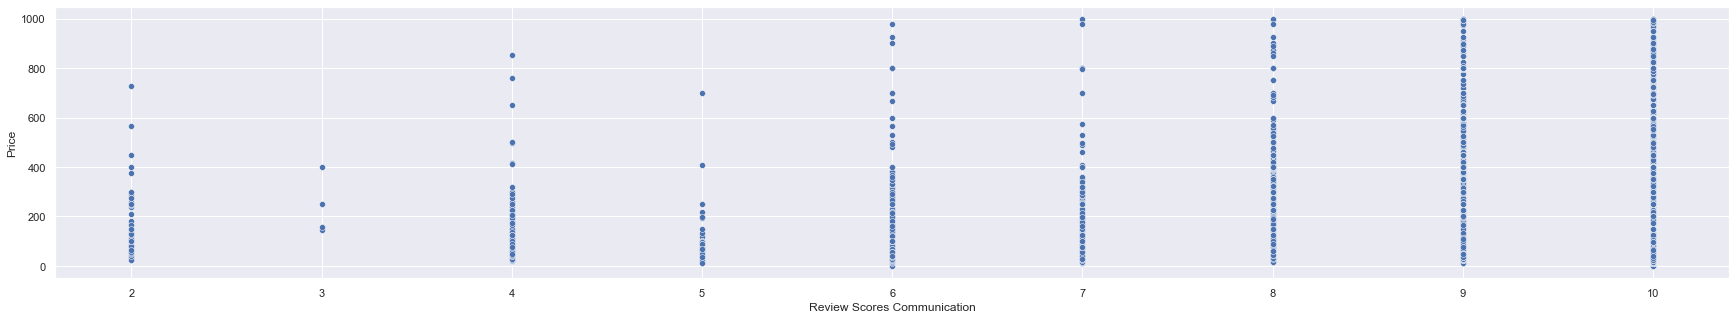

In [247]:
plt.figure(figsize = (30,5))
sns.scatterplot(x = data["Review Scores Communication"], y = data["Price"])
plt.show()

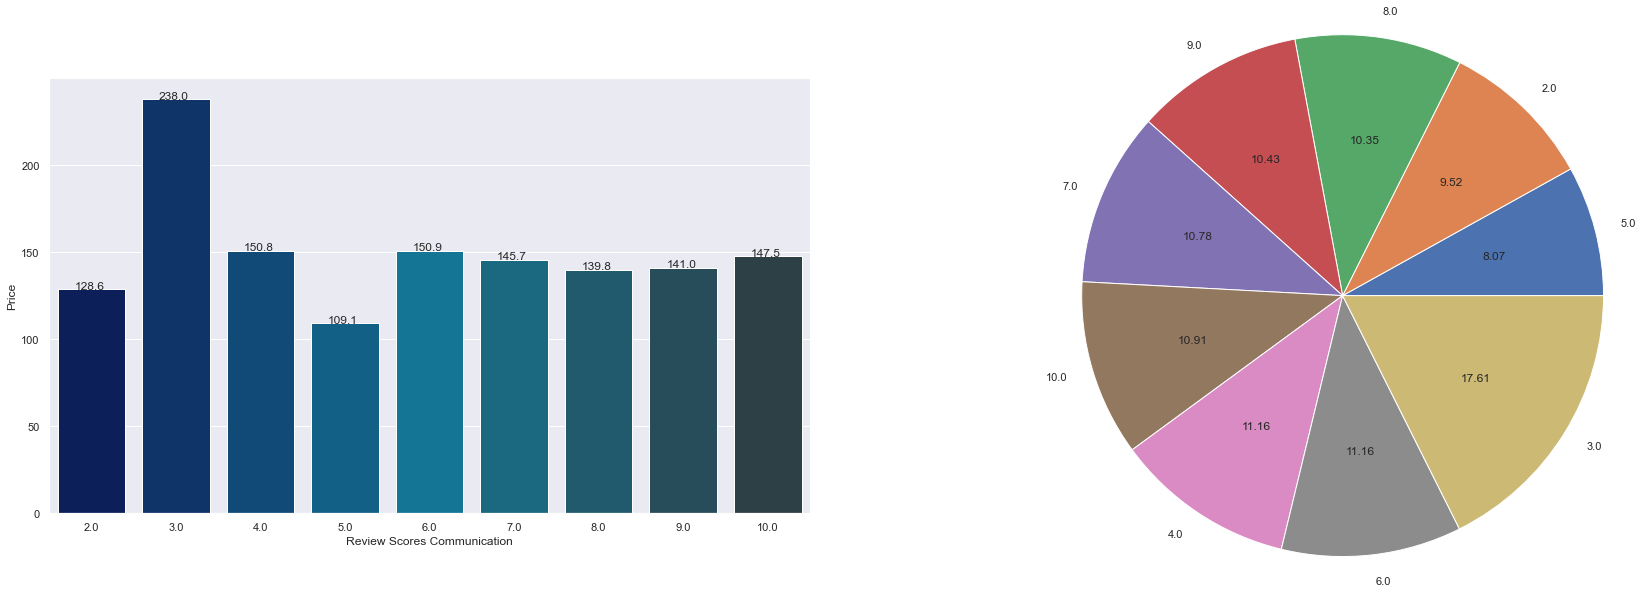

In [248]:
grouped = data.groupby("Review Scores Communication")[["Price"]].mean().reset_index().sort_values("Price")

plt.figure(figsize = (30,8))
plt.subplot(1,2,1)
ax = sns.barplot(grouped["Review Scores Communication"], grouped["Price"], palette = "ocean_d")
for i in ax.patches:
        ax.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.2, i.get_height()))

plt.subplot(1,2,2)
plt.pie(grouped["Price"], labels=grouped["Review Scores Communication"], autopct="%.2f", radius=1.5)
plt.show()

### Is there any relationship between review score location and the price?

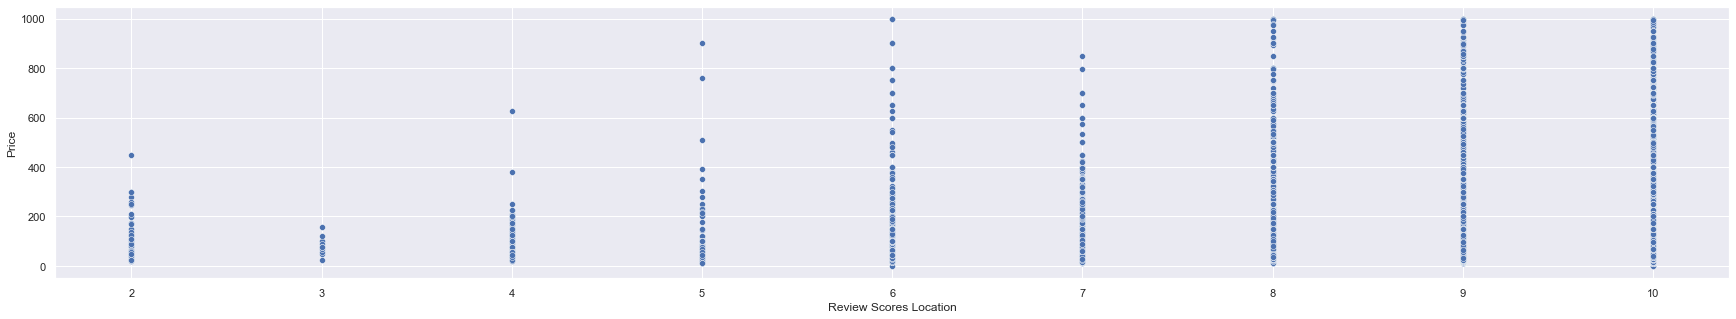

In [250]:
plt.figure(figsize = (30,5))
sns.scatterplot(x = data["Review Scores Location"], y = data["Price"])
plt.show()

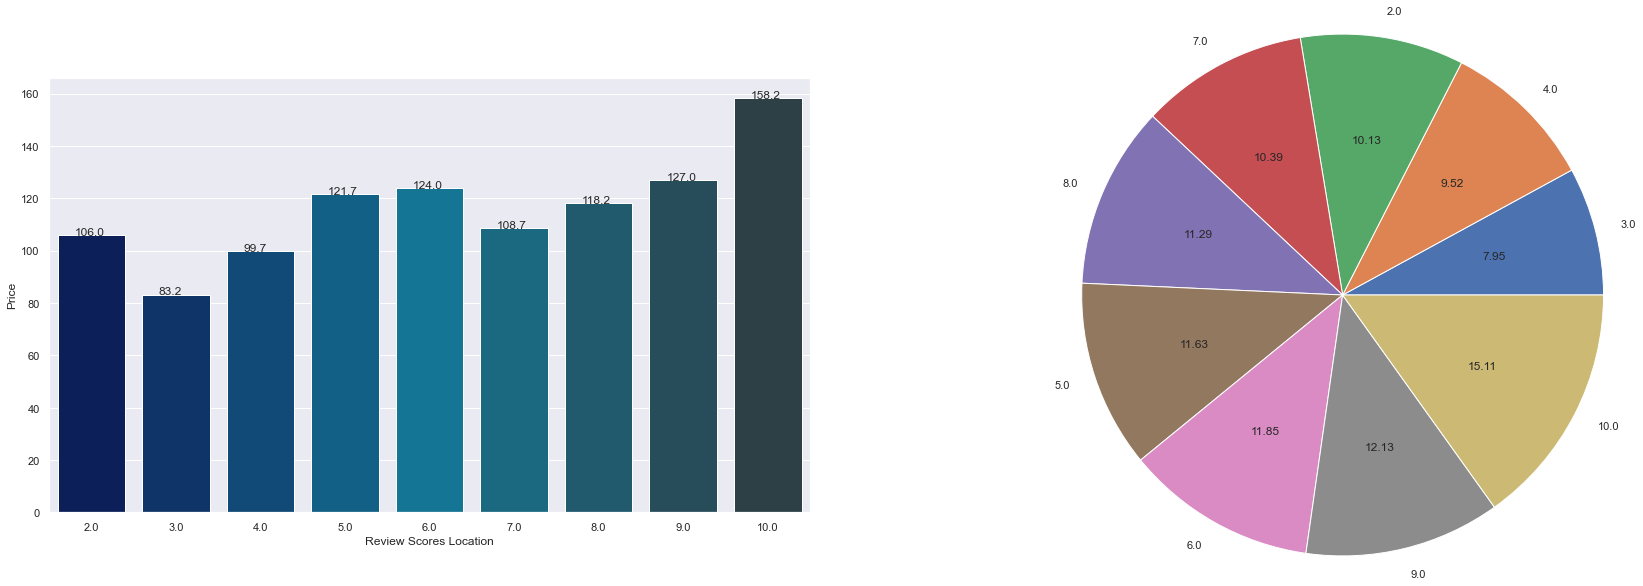

In [251]:
grouped = data.groupby("Review Scores Location")[["Price"]].mean().reset_index().sort_values("Price")

plt.figure(figsize = (30,8))
plt.subplot(1,2,1)
ax = sns.barplot(grouped["Review Scores Location"], grouped["Price"], palette = "ocean_d")
for i in ax.patches:
        ax.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.2, i.get_height()))

plt.subplot(1,2,2)
plt.pie(grouped["Price"], labels=grouped["Review Scores Location"], autopct="%.2f", radius=1.5)
plt.show()

### Property Type Vs Room Type

In [263]:
pd.crosstab(data["Property Type"], data["Room Type"])

Room Type,entire home/apt,private room,shared room
Property Type,,,
apartment,46967,26749,2389
bed & breakfast,158,839,127
boat,122,18,0
boutique hotel,32,140,1
bungalow,639,108,5
cabin,200,45,4
camper/rv,206,36,7
casa particular,0,1,0
castle,12,11,1


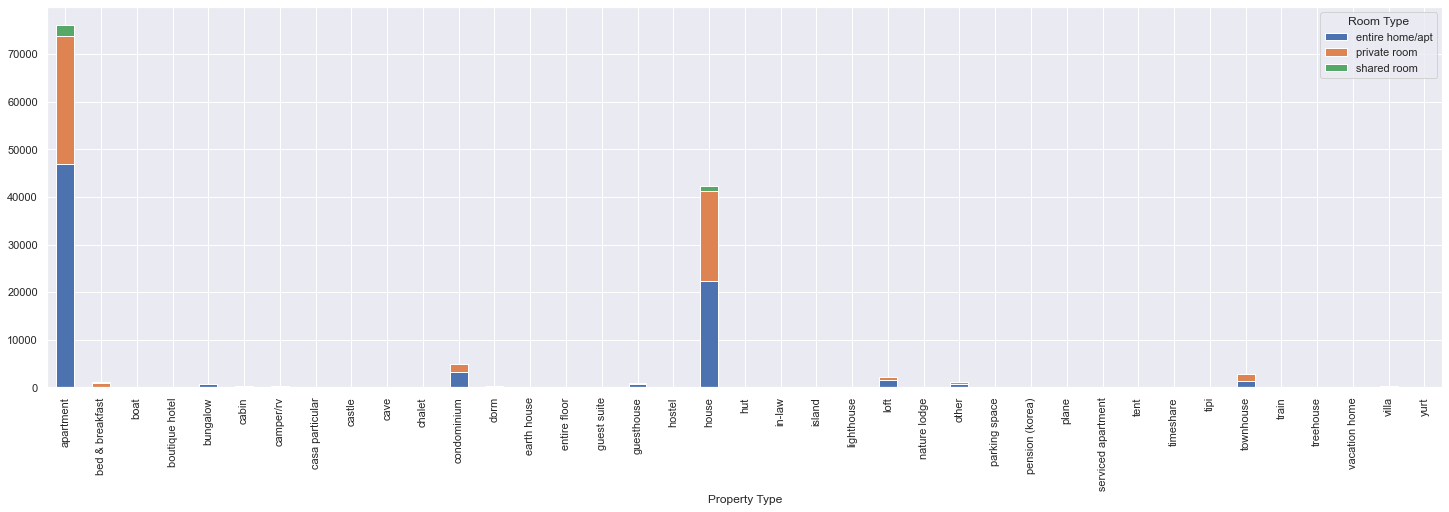

In [262]:
pd.crosstab(data["Property Type"], data["Room Type"]).plot(kind = "bar", figsize = (25,7), stacked = True)
plt.show()